## Data cleaning

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

# read the data from NYC OpenData
raw_data=pd.read_csv('https://data.cityofnewyork.us/resource/uip8-fykc.csv?$limit=200000')
new_data=raw_data.dropna(how='any')
new_data= new_data.reset_index()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154011 entries, 0 to 154010
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              154011 non-null  int64  
 1   arrest_key         154011 non-null  int64  
 2   arrest_date        154011 non-null  object 
 3   pd_cd              154011 non-null  float64
 4   pd_desc            154011 non-null  object 
 5   ky_cd              154011 non-null  float64
 6   ofns_desc          154011 non-null  object 
 7   law_code           154011 non-null  object 
 8   law_cat_cd         154011 non-null  object 
 9   arrest_boro        154011 non-null  object 
 10  arrest_precinct    154011 non-null  int64  
 11  jurisdiction_code  154011 non-null  int64  
 12  age_group          154011 non-null  object 
 13  perp_sex           154011 non-null  object 
 14  perp_race          154011 non-null  object 
 15  x_coord_cd         154011 non-null  int64  
 16  y_

In [2]:
# convert arrest_boro to 'Bronx','Staten Island','Brooklyn','Manhattan','Queens'
new_data['arrest_boro'] = new_data['arrest_boro'].replace(['B','S','K','M','Q'],['Bronx','Staten_Island','Brooklyn','Manhattan','Queens'])

# replace space in new_data['pd_desc'] with "_"
new_data['pd_desc'] = new_data['pd_desc'].str.replace(" ","_")
new_data.head()

,index,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
0,0,238013474,2021-12-18T00:00:00.000,157.0,RAPE_1,104.0,RAPE,PL 1303501,F,Queens,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,1,236943583,2021-11-25T00:00:00.000,263.0,"ARSON_2,3,4",114.0,ARSON,PL 1501500,F,Brooklyn,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,2,234938876,2021-10-14T00:00:00.000,594.0,OBSCENITY_1,116.0,SEX CRIMES,PL 2631100,F,Brooklyn,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,3,234788259,2021-10-11T00:00:00.000,263.0,"ARSON_2,3,4",114.0,ARSON,PL 1501001,F,Bronx,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,5,234117071,2021-09-27T00:00:00.000,157.0,RAPE_1,104.0,RAPE,PL 1303501,F,Brooklyn,84,0,25-44,M,BLACK,989013,192652,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)


In [3]:
'''
precinct_number = []
for i in range(0,len(new_data)):
  #if the number not in precinct_number, then append to this list
  if new_data["arrest_precinct"][i] not in precinct_number:
    precinct_number.append(new_data["arrest_precinct"][i])
  #if in, then move to next number
  else:
    continue
#sort the numbers in list from small to large
'''

precinct_number=new_data.arrest_precinct.unique().tolist()
precinct_number.sort()
print(precinct_number)

[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 81, 83, 84, 88, 90, 94, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 123]


In [4]:
#Set up six crime types
for j in range(0,len(new_data)):
  if "FELONY" in new_data["ofns_desc"][j]:
    new_data["ofns_desc"][j] = "FELONY"
  elif "LARCENY" in new_data["ofns_desc"][j]:
    new_data["ofns_desc"][j] = "LARCENY"
  elif "MURDER" in new_data["ofns_desc"][j]:
    new_data["ofns_desc"][j] = "MURDER"
  elif "RAPE" in new_data["ofns_desc"][j]:
    new_data["ofns_desc"][j] = "RAPE"
  elif "ROBBERY" in new_data["ofns_desc"][j]:
    new_data["ofns_desc"][j] = "ROBBERY"
  else:
    new_data["ofns_desc"][j] = "OTHERS"
print(new_data)

         index  arrest_key              arrest_date  pd_cd  \
0            0   238013474  2021-12-18T00:00:00.000  157.0   
1            1   236943583  2021-11-25T00:00:00.000  263.0   
2            2   234938876  2021-10-14T00:00:00.000  594.0   
3            3   234788259  2021-10-11T00:00:00.000  263.0   
4            5   234117071  2021-09-27T00:00:00.000  157.0   
...        ...         ...                      ...    ...   
154006  155502   222884924  2021-01-10T00:00:00.000  397.0   
154007  155503   223918625  2021-02-03T00:00:00.000  792.0   
154008  155504   224323770  2021-02-13T00:00:00.000  101.0   
154009  155505   222599533  2021-01-04T00:00:00.000  792.0   
154010  155506   224056881  2021-02-06T00:00:00.000  268.0   

                               pd_desc  ky_cd ofns_desc    law_code  \
0                               RAPE_1  104.0      RAPE  PL 1303501   
1                          ARSON_2,3,4  114.0    OTHERS  PL 1501500   
2                          OBSCENITY_1  11

In [6]:
#Pick out the id in the loop, and then find the crime in the corresponding precinct from the new_data
all_felony_percentage = []
all_larceny_percentage = []
all_murder_percentage = []
all_rape_percentage = []
all_robbery_percentage = []
all_others_percentage = []
for precinct in precinct_number:
  #get the new_data that only contain the data of this precinct
  #print("in precinct",precinct)
  only_left_precinct = new_data.copy()
  only_left_precinct.drop(only_left_precinct[(only_left_precinct.arrest_precinct != precinct)].index,inplace=True)
  #print("droped new_data")
  #print(only_left_precinct)
  
  entire_crime_number = len(only_left_precinct)
  #The percentage of felony
  felony_percentage = ((only_left_precinct["ofns_desc"] == "FELONY").sum())/entire_crime_number * 100
  all_felony_percentage.append(round(felony_percentage,3))
  larceny_percentage = ((only_left_precinct["ofns_desc"] == "LARCENY").sum())/entire_crime_number * 100
  all_larceny_percentage.append(round(larceny_percentage,3))
  murder_percentage = ((only_left_precinct["ofns_desc"] == "MURDER").sum())/entire_crime_number * 100
  all_murder_percentage.append(round(murder_percentage,3))
  rape_percentage = ((only_left_precinct["ofns_desc"] == "RAPE").sum())/entire_crime_number * 100
  all_rape_percentage.append(round(rape_percentage,3))
  robbery_percentage = ((only_left_precinct["ofns_desc"] == "ROBBERY").sum())/entire_crime_number * 100
  all_robbery_percentage.append(round(robbery_percentage,3))
  others_percentage = ((only_left_precinct["ofns_desc"] == "OTHERS").sum())/entire_crime_number * 100
  all_others_percentage.append(round(others_percentage,3))
  
print("all the felony percentage:")
print(all_felony_percentage)
print("all the larceny percentage:")
print(all_larceny_percentage)
print("all the murder percentage:")
print(all_murder_percentage)
print("all the rape percentage:")
print(all_rape_percentage)
print("all the robbery percentage:")
print(all_robbery_percentage)
print("all the others percentage:")
print(all_others_percentage)


all the felony percentage:
[5.147, 10.661, 7.908, 9.739, 8.233, 9.348, 9.095, 7.077, 9.305, 5.128, 6.153, 6.807, 12.0, 13.829, 8.094, 8.178, 10.978, 7.109, 9.258, 13.188, 10.718, 11.103, 9.718, 12.283, 13.906, 12.824, 12.543, 12.727, 11.832, 12.12, 10.772, 13.943, 8.256, 10.46, 12.737, 12.559, 9.03, 9.249, 13.405, 14.95, 6.042, 11.135, 13.141, 11.93, 8.358, 15.152, 14.88, 8.973, 11.105, 9.216, 9.622, 13.815, 10.54, 9.017, 11.954, 9.308, 7.31, 11.138, 14.825, 10.677, 12.434, 11.182, 14.333, 13.777, 8.517, 10.211, 6.456, 12.954, 10.116, 7.101, 8.765, 9.271, 10.368, 9.097, 8.111, 9.274, 4.266]
all the larceny percentage:
[37.131, 17.904, 22.113, 23.201, 17.488, 15.947, 30.482, 27.064, 27.594, 42.266, 40.738, 40.04, 16.0, 9.111, 21.873, 6.729, 13.972, 18.453, 13.07, 5.975, 19.961, 8.668, 8.457, 5.399, 8.003, 10.584, 9.258, 14.68, 9.052, 7.232, 6.712, 11.735, 18.596, 14.101, 10.499, 12.964, 15.251, 19.169, 17.158, 5.615, 10.278, 5.712, 14.967, 7.317, 15.29, 5.866, 12.14, 9.103, 5.13, 22.881

In [7]:
def get_properties_percentage(percentage_list,crime_type):
      result_list = []
      for k in range(0,len(all_felony_percentage)):
        precinct_percentage = []
        precinct_percentage.append(crime_type)
        precinct_percentage.append(percentage_list[k])
        result_list.append(precinct_percentage)
      return result_list



#get "FELONY","LARCENY","MURDER","RAPE","ROBBERY","OTHERS"

felony_property_percentage = get_properties_percentage(all_felony_percentage,"FELONY")
larceny_property_percentage = get_properties_percentage(all_larceny_percentage,"LARCENY")
murder_property_percentage = get_properties_percentage(all_murder_percentage,"MURDER")
rape_property_percentage = get_properties_percentage(all_rape_percentage,"RAPE")
robbery_property_percentage = get_properties_percentage(all_robbery_percentage,"ROBBERY")
others_property_percentage = get_properties_percentage(all_others_percentage,"OTHERS")

print("felony:")
print(felony_property_percentage)
print("larceny")
print(larceny_property_percentage)
print("murder")
print(murder_property_percentage)
print("rape")
print(rape_property_percentage)
print("robbery")
print(robbery_property_percentage)
print("others")
print(others_property_percentage)


felony:
[['FELONY', 5.147], ['FELONY', 10.661], ['FELONY', 7.908], ['FELONY', 9.739], ['FELONY', 8.233], ['FELONY', 9.348], ['FELONY', 9.095], ['FELONY', 7.077], ['FELONY', 9.305], ['FELONY', 5.128], ['FELONY', 6.153], ['FELONY', 6.807], ['FELONY', 12.0], ['FELONY', 13.829], ['FELONY', 8.094], ['FELONY', 8.178], ['FELONY', 10.978], ['FELONY', 7.109], ['FELONY', 9.258], ['FELONY', 13.188], ['FELONY', 10.718], ['FELONY', 11.103], ['FELONY', 9.718], ['FELONY', 12.283], ['FELONY', 13.906], ['FELONY', 12.824], ['FELONY', 12.543], ['FELONY', 12.727], ['FELONY', 11.832], ['FELONY', 12.12], ['FELONY', 10.772], ['FELONY', 13.943], ['FELONY', 8.256], ['FELONY', 10.46], ['FELONY', 12.737], ['FELONY', 12.559], ['FELONY', 9.03], ['FELONY', 9.249], ['FELONY', 13.405], ['FELONY', 14.95], ['FELONY', 6.042], ['FELONY', 11.135], ['FELONY', 13.141], ['FELONY', 11.93], ['FELONY', 8.358], ['FELONY', 15.152], ['FELONY', 14.88], ['FELONY', 8.973], ['FELONY', 11.105], ['FELONY', 9.216], ['FELONY', 9.622], ['F

In [8]:
import json

with open("/content/precincts.geojson", "r") as f:
    map_data = json.load(f)

def add_property(property_list,map_data):
  for t in range(0,len(map_data["features"])):
    feat = map_data["features"][t]
    feat["properties"][property_list[t][0]] = property_list[t][1]
  return map_data

map_data = add_property(felony_property_percentage,map_data)
map_data = add_property(larceny_property_percentage,map_data)
map_data = add_property(murder_property_percentage,map_data)
map_data = add_property(rape_property_percentage,map_data)
map_data = add_property(robbery_property_percentage,map_data)
map_data = add_property(others_property_percentage,map_data)

with open("final.geojson","w") as f:
    json.dump(map_data,f)

FileNotFoundError: [Errno 2] No such file or directory: '/content/precincts.geojson'

## Data exploratory analysis(maybe not)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## Database

In [6]:
import sqlite3
con = sqlite3.connect('nypd_data.db')
#new_data.to_sql(name='data_a',con=con)

## Dashboard

In [7]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
from keplergl import KeplerGl
import requests
import numpy as np
from pandas.api.types import CategoricalDtype
import geopandas

In [8]:
ALL='ALL'
def unique_val(arr):
    unique=arr.unique().tolist()
    unique.sort()
    unique.insert(0,ALL)
    return unique

drop_boro=widgets.Dropdown(
    options= unique_val(new_data.arrest_boro),
    value=ALL,
    description='select boro'
)

def boro_date(change):
    #'Bronx','Staten Island','Brooklyn','Manhattan','Queens'
    if change==ALL:
        data=pd.read_sql("SELECT arrest_date, count(arrest_date) FROM data_a GROUP BY arrest_date",con=con)
    elif change=='Bronx':
        data=pd.read_sql("SELECT arrest_date, count(arrest_date) FROM data_a where arrest_boro=='Bronx' GROUP BY arrest_date",con=con)
    elif change=='Brooklyn':
        data=pd.read_sql("SELECT arrest_date, count(arrest_date) FROM data_a where arrest_boro=='Brooklyn' GROUP BY arrest_date",con=con)
    elif change=='Manhattan':
        data=pd.read_sql("SELECT arrest_date, count(arrest_date) FROM data_a where arrest_boro=='Manhattan' GROUP BY arrest_date",con=con)
    elif change=='Queens':
        data=pd.read_sql("SELECT arrest_date, count(arrest_date) FROM data_a where arrest_boro=='Queens' GROUP BY arrest_date",con=con)
    elif change=='Staten_Island':
        data=pd.read_sql("SELECT arrest_date, count(arrest_date) FROM data_a where arrest_boro=='Staten_Island' GROUP BY arrest_date",con=con)
    data['arrest_date'] = pd.to_datetime(data['arrest_date'],format='%Y/%m/%d')
    return data

def boro_ofns(change):
    if change==ALL:
        data=pd.read_sql("SELECT ofns_desc, count(ofns_desc) FROM data_a GROUP BY ofns_desc LIMIT 5",con=con)
    elif change=='Bronx':
        data=pd.read_sql("SELECT ofns_desc, count(ofns_desc) FROM data_a where arrest_boro=='Bronx' GROUP BY ofns_desc LIMIT 5",con=con)
    elif change=='Brooklyn':
        data=pd.read_sql("SELECT ofns_desc, count(ofns_desc) FROM data_a where arrest_boro=='Brooklyn' GROUP BY ofns_desc LIMIT 5",con=con)
    elif change=='Manhattan':
        data=pd.read_sql("SELECT ofns_desc, count(ofns_desc) FROM data_a where arrest_boro=='Manhattan' GROUP BY ofns_desc LIMIT 5",con=con)
    elif change=='Queens':
        data=pd.read_sql("SELECT ofns_desc, count(ofns_desc) FROM data_a where arrest_boro=='Queens' GROUP BY ofns_desc LIMIT 5",con=con)
    elif change=='Staten_Island':
        data=pd.read_sql("SELECT ofns_desc, count(ofns_desc) FROM data_a where arrest_boro=='Staten_Island' GROUP BY ofns_desc LIMIT 5",con=con)
    return data
    

def boro_sex(change):
    if change==ALL:
        data=pd.read_sql("SELECT perp_sex,age_group, count(age_group) FROM data_a GROUP BY perp_sex,age_group",con=con)
    elif change=='Bronx':
        data=pd.read_sql("SELECT perp_sex,age_group, count(age_group) FROM data_a where arrest_boro=='Bronx' GROUP BY perp_sex,age_group",con=con)
    elif change=='Brooklyn':
        data=pd.read_sql("SELECT perp_sex,age_group, count(age_group) FROM data_a where arrest_boro=='Brooklyn' GROUP BY perp_sex,age_group",con=con)
    elif change=='Manhattan':
        data=pd.read_sql("SELECT perp_sex,age_group, count(age_group) FROM data_a where arrest_boro=='Manhattan' GROUP BY perp_sex,age_group",con=con)
    elif change=='Queens':
        data=pd.read_sql("SELECT perp_sex,age_group, count(age_group) FROM data_a where arrest_boro=='Queens' GROUP BY perp_sex,age_group",con=con)
    elif change=='Staten_Island':
        data=pd.read_sql("SELECT perp_sex,age_group, count(age_group) FROM data_a where arrest_boro=='Staten_Island' GROUP BY perp_sex,age_group",con=con)
    cat_size_order = CategoricalDtype(
    ['<18','18-24','25-44','45-64','65+'], 
    ordered=True
    )
    data['age_group'] = data['age_group'].astype(cat_size_order)
    data.sort_values('age_group')
    return data

def boro_race(change):
    if change==ALL:
        data=pd.read_sql("SELECT perp_race,age_group, count(age_group) FROM data_a GROUP BY perp_race,age_group",con=con)
    elif change=='Bronx':
        data=pd.read_sql("SELECT perp_race,age_group, count(age_group) FROM data_a where arrest_boro=='Bronx' GROUP BY perp_race,age_group",con=con)
    elif change=='Brooklyn':
        data=pd.read_sql("SELECT perp_race,age_group, count(age_group) FROM data_a where arrest_boro=='Brooklyn' GROUP BY perp_race,age_group",con=con)
    elif change=='Manhattan':
        data=pd.read_sql("SELECT perp_race,age_group, count(age_group) FROM data_a where arrest_boro=='Manhattan' GROUP BY perp_race,age_group",con=con)
    elif change=='Queens':
        data=pd.read_sql("SELECT perp_race,age_group, count(age_group) FROM data_a where arrest_boro=='Queens' GROUP BY perp_race,age_group",con=con)
    elif change=='Staten_Island':
        data=pd.read_sql("SELECT perp_race,age_group, count(age_group) FROM data_a where arrest_boro=='Staten_Island' GROUP BY perp_race,age_group",con=con)
    
    cat_size_order = CategoricalDtype(
    ['<18','18-24','25-44','45-64','65+'], 
    ordered=True
    )
    data['age_group'] = data['age_group'].astype(cat_size_order)
    data.sort_values('age_group')
    return data

def boro_race_law(change):
    if change==ALL:
        data=pd.read_sql("SELECT law_cat_cd,perp_race, count(perp_race) FROM data_a GROUP BY law_cat_cd,perp_race",con=con)
    elif change=='Bronx':
        data=pd.read_sql("SELECT law_cat_cd,perp_race, count(perp_race) FROM data_a where arrest_boro=='Bronx' GROUP BY law_cat_cd,perp_race",con=con)
    elif change=='Brooklyn':
        data=pd.read_sql("SELECT law_cat_cd,perp_race, count(perp_race) FROM data_a where arrest_boro=='Brooklyn' GROUP BY law_cat_cd,perp_race",con=con)
    elif change=='Manhattan':
        data=pd.read_sql("SELECT law_cat_cd,perp_race, count(perp_race) FROM data_a where arrest_boro=='Manhattan' GROUP BY law_cat_cd,perp_race",con=con)
    elif change=='Queens':
        data=pd.read_sql("SELECT law_cat_cd,perp_race, count(perp_race) FROM data_a where arrest_boro=='Queens' GROUP BY law_cat_cd,perp_race",con=con)
    elif change=='Staten_Island':
        data=pd.read_sql("SELECT law_cat_cd,perp_race, count(perp_race) FROM data_a where arrest_boro=='Staten_Island' GROUP BY law_cat_cd,perp_race",con=con)
    
    return data

def boro_age_law(change):
    if change==ALL:
        data=pd.read_sql("SELECT law_cat_cd,age_group, count(age_group) FROM data_a GROUP BY law_cat_cd,age_group",con=con)
    elif change=='Bronx':
        data=pd.read_sql("SELECT law_cat_cd,age_group, count(age_group) FROM data_a where arrest_boro=='Bronx' GROUP BY law_cat_cd,age_group",con=con)
    elif change=='Brooklyn':
        data=pd.read_sql("SELECT law_cat_cd,age_group, count(age_group) FROM data_a where arrest_boro=='Brooklyn' GROUP BY law_cat_cd,age_group",con=con)
    elif change=='Manhattan':
        data=pd.read_sql("SELECT law_cat_cd,age_group, count(age_group) FROM data_a where arrest_boro=='Manhattan' GROUP BY law_cat_cd,age_group",con=con)
    elif change=='Queens':
        data=pd.read_sql("SELECT law_cat_cd,age_group, count(age_group) FROM data_a where arrest_boro=='Queens' GROUP BY law_cat_cd,age_group",con=con)
    elif change=='Staten_Island':
        data=pd.read_sql("SELECT law_cat_cd,age_group, count(age_group) FROM data_a where arrest_boro=='Staten_Island' GROUP BY law_cat_cd,age_group",con=con)
    
    cat_size_order = CategoricalDtype(
    ['<18','18-24','25-44','45-64','65+'], 
    ordered=True
    )
    data['age_group'] = data['age_group'].astype(cat_size_order)
    data.sort_values('age_group')
    
    return data

def boro_map(change,axbig,map):
    if change==ALL:
        map.plot("area", alpha=0.5, edgecolor='k',legend=False,ax=axbig)
        point=geopandas.GeoDataFrame(new_data.arrest_boro,
                                    geometry=geopandas.GeoSeries.from_wkt(new_data.geocoded_column))

    elif change=='Bronx':
        map[map.BoroCode==2].plot("area", alpha=0.5, edgecolor='k',legend=False,ax=axbig)
        point=geopandas.GeoDataFrame(new_data.arrest_boro[new_data.arrest_boro=='Bronx'],
                                    geometry=geopandas.GeoSeries.from_wkt(new_data.geocoded_column))
    elif change=='Brooklyn':
        map[map.BoroCode==3].plot("area", alpha=0.5, edgecolor='k',legend=False,ax=axbig)
        point=geopandas.GeoDataFrame(new_data.arrest_boro[new_data.arrest_boro=='Brooklyn'],
                                    geometry=geopandas.GeoSeries.from_wkt(new_data.geocoded_column))
    elif change=='Manhattan':
        map[map.BoroCode==1].plot("area", alpha=0.5, edgecolor='k',legend=False,ax=axbig)
        point=geopandas.GeoDataFrame(new_data.arrest_boro[new_data.arrest_boro=='Manhattan'],
                                    geometry=geopandas.GeoSeries.from_wkt(new_data.geocoded_column))
    elif change=='Queens':
        map[map.BoroCode==4].plot("area", alpha=0.5, edgecolor='k',legend=False,ax=axbig)
        point=geopandas.GeoDataFrame(new_data.arrest_boro[new_data.arrest_boro=='Queens'],
                                    geometry=geopandas.GeoSeries.from_wkt(new_data.geocoded_column))
    elif change=='Staten Island':
        map[map.BoroCode==5].plot("area", alpha=0.5, edgecolor='k',legend=False,ax=axbig)
        point=geopandas.GeoDataFrame(new_data.arrest_boro[new_data.arrest_boro=='Staten_Island'],
                                    geometry=geopandas.GeoSeries.from_wkt(new_data.geocoded_column))
    point.plot(ax=axbig,legend=False,alpha = 0.01)
    
    

def draw_box(change):
    fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(16, 15),constrained_layout = True)
     

    #draw boro arrest time
    sns.lineplot(ax=axes[0][0],x='arrest_date',y='count(arrest_date)',data= boro_date(change))
    #draw boro ofns category
    piechart,texts=axes[0][1].pie(boro_ofns(change)['count(ofns_desc)'])
    ratio = 100.*boro_ofns(change)['count(ofns_desc)']/boro_ofns(change)['count(ofns_desc)'].sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(boro_ofns(change)['ofns_desc'],ratio)]
    sort_legend = True
    if sort_legend:
        piechart, labels, dummy =  zip(*sorted(zip(piechart, labels,boro_ofns(change)['count(ofns_desc)']),
                                          key=lambda x: boro_ofns(change)['ofns_desc'][2],
                                          reverse=True))
    axes[0][1].legend(piechart, labels, loc='upper left', bbox_to_anchor=(0.95,1.025),fontsize=10)
    #

    sns.barplot(ax=axes[1][0],x='age_group',y="count(age_group)", hue="perp_sex",palette="pastel", data=boro_sex(change))

    #
    sns.barplot(ax=axes[1][1],x='age_group',y="count(age_group)", hue="perp_race",palette="pastel", data=boro_race(change))
    axes[1][1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    #

    sns.barplot(ax=axes[2][0],x="count(age_group)", y="age_group", hue="law_cat_cd",data=boro_age_law(change),palette="pastel")
    #
    sns.barplot(ax=axes[3][0],x="count(perp_race)", y="law_cat_cd",hue="perp_race",data=boro_race_law(change),palette="pastel")
    axes[2][1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)




    
    grid_subplot = axes[2,0].get_gridspec()
    for ax in axes[-2:, -1]:
        ax.remove()
    axbig = fig.add_subplot(grid_subplot[-2:, -1])
    
    #    
    path_to_data = geopandas.datasets.get_path("nybb")
    nyc_map = geopandas.read_file(path_to_data)
    nyc_map=nyc_map.set_index("BoroName")
    nyc_map["area"]=nyc_map.area
    nyc_map =nyc_map.set_geometry("geometry")
    nyc_map_4326 = nyc_map.to_crs("EPSG:4326")
    boro_map(change,axbig,nyc_map_4326)
    
interact(draw_box,change=drop_boro)


interactive(children=(Dropdown(description='select boro', options=('ALL', 'Bronx', 'Brooklyn', 'Manhattan', 'Q…

<function __main__.draw_box(change)>

## Arrest Data Map Near Me

In [9]:
import ipywidgets as widgets
from ipyleaflet import Map,basemaps,Marker
from IPython.display import display

In [45]:
# get my location
import requests
import json
def display_ip():
   ip_request = requests.get('https://get.geojs.io/v1/ip.json')
   my_ip = ip_request.json()['ip']
   geo_request = requests.get('https://get.geojs.io/v1/ip/geo/' +my_ip + '.json')
   geo_data = geo_request.json()
   return(geo_data['latitude'],geo_data['longitude'])
 
location = display_ip()
my_latitude = float(location[0])
my_longitude = float(location[1])

In [46]:
# location of NYU Stern Business School
# my_latitude = 40.728515
# my_longitude = -73.994781

In [47]:
#Initialize a Map
center = [my_latitude, my_longitude]
zoom = 16.1
m = Map(basemap=basemaps.OpenStreetMap.Mapnik,center=center, zoom=zoom)

In [48]:
#Define the filtering function (from Karim's algorithm) 
def common_filtering(m):
    
    #clear the previous markers on the map
    base_layer = m.layers[0]
    m.clear_layers()
    m.add_layer(base_layer)

    results_df = new_data

    # convert to miles where 1 degree = 68.703 miles
    results_df["distance"] = (abs(results_df['latitude'] - my_latitude) + abs(results_df['longitude'] - my_longitude)) * 68.703

    # sort by distance
    results_df = results_df.sort_values(["distance"],ascending=[True])

    #get the nearest 50 results to display
    results_df = results_df.head(50)

    for index, row in results_df.iterrows():        
        center = (row['latitude'],row['longitude'])
        marker = Marker(location = center, draggable = False, title = str(row['arrest_key']))
        m.add_layer(marker)
        
    return(results_df)

In [49]:
# filter the nearest points on map
result = common_filtering(m)
m

Map(center=[40.7359, -73.9904], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

<AxesSubplot:xlabel='age_group', ylabel='counts'>

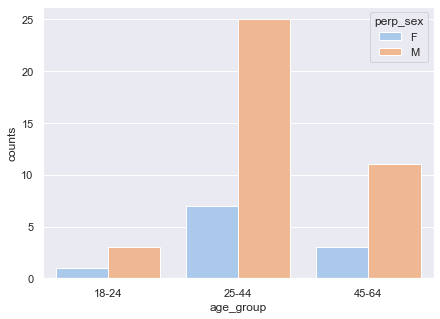

In [53]:
# statistic of the nearest 50 results
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='age_group',y="counts", hue="perp_sex",palette="pastel", data=result.groupby(['perp_sex','age_group']).size().reset_index(name='counts'))